# Stable Baselines3 套件測試

## 載入套件

In [1]:
import gymnasium as gym
from stable_baselines3 import DQN, PPO
import matplotlib.pyplot as plt
import numpy as np

## 指定DQN演算法及環境，完成模型訓練

In [2]:
model = DQN('MlpPolicy', "CartPole-v1", verbose=False).learn(30_000)

## 模型評估

In [6]:
def evaluate():
    vec_env = model.get_env() # VecEnv resets automatically   
    obs = vec_env.reset()
    all_episode_rewards = []
    for _ in range(100):
        episode_rewards = []
        done = False
        while not done:
            # `deterministic` is to use deterministic actions
            action, _states = model.predict(obs, deterministic=True)
            # here, action, rewards and dones are arrays
            # because we are using vectorized env
            obs, reward, done, _info = vec_env.step(action)
            episode_rewards.append(reward)
    
        all_episode_rewards.append(sum(episode_rewards))
    mean_episode_reward = np.mean(all_episode_rewards)
    print(f"Mean reward: {mean_episode_reward:.2f}")
    return all_episode_rewards
    
all_episode_rewards = evaluate()

Mean reward: 13.63


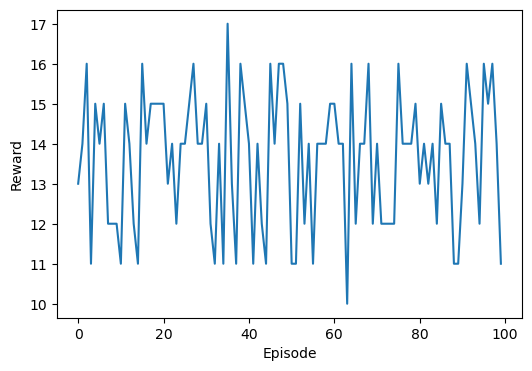

In [7]:
def plot_reward():
    plt.figure(figsize=(6,4))
    plt.plot(all_episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

plot_reward()

## 指定PPO演算法及環境，完成模型訓練

In [8]:
model = PPO('MlpPolicy', "CartPole-v1", verbose=False, device='cpu').learn(30_000)

Mean reward: 500.00


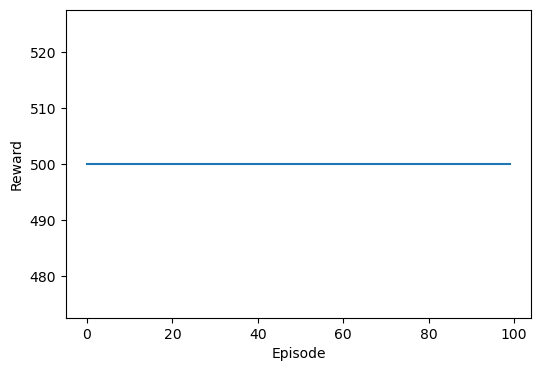

In [9]:
all_episode_rewards = evaluate()
plot_reward()